# Regresión lineal simple en Python
## El paquete statsmodel para regresión lineal

In [23]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("../../data/datasets/ads/Advertising.csv")

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
import statsmodels.formula.api as smf

In [7]:
lm = smf.ols(formula="Sales~TV", data=data).fit()

In [9]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo sería:
* Sales = 7.032594 + 0.047537 * TV

In [13]:
lm.pvalues # P-valores

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [11]:
lm.rsquared # Valor de R2

0.611875050850071

In [12]:
lm.rsquared_adj # R2 ajustado

0.6099148238341623

In [16]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           1.47e-42
Time:                        18:45:37   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [18]:
import matplotlib.pyplot as plt

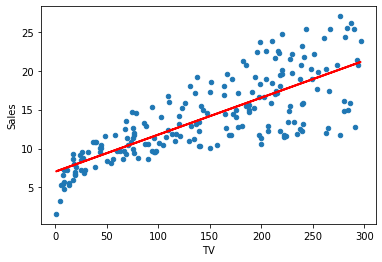

In [19]:
%matplotlib inline
data.plot(kind="scatter", x="TV", y="Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth=2)

In [20]:
data["sales_pred"] = 7.032594 + 0.047537 * data["TV"]

In [21]:
data["RSE"] = (data["Sales"] - data["sales_pred"])**2

In [25]:
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [26]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656369238098

In [31]:
sales_m = np.mean(data["Sales"])
sales_m # Ventas promedio

14.022500000000003

In [28]:
error_prom = RSE / sales_m
error_prom

0.2323876890168014

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

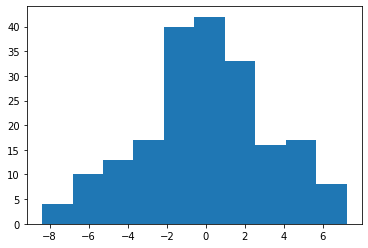

In [30]:
plt.hist(data["Sales"] - data["sales_pred"])

# Regresión lineal múltiple en Python
## El paquete statsmodel para regresión múltiple
* Sales ~ TV
* Sales ~ Newspaper
* Sales ~ Radio
* Sales ~ TV + Newspaper
* Sales ~ TV + Radio
* Sales ~ Newspaper + Radio
* Sales ~ TV + Newspaper + Radio

In [32]:
#Añadir el newspaper al modelo existente
lm2 = smf.ols(formula="Sales~TV+Newspaper", data=data).fit()

In [33]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [34]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Sales = 5.774948 + 0.046901TV + 0.044219Newspaper

In [35]:
lm2.rsquared

0.6458354938293273

In [36]:
lm2.rsquared_adj

0.6422399150864777

In [37]:
sales_pred = lm2.predict(data[["TV", "Newspaper"]])

In [38]:
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [39]:
SSD = sum((data["Sales"] - sales_pred)**2)
SSD

1918.5618118968273

In [40]:
RSE = np.sqrt(SSD/(len(data)-2-1)) # -2 = dos variables predictoras
RSE

3.120719860252885

In [42]:
error = RSE / sales_m
error

0.22255089037282116

In [43]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           3.95e-45
Time:                        20:22:59   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Mejora marginal en el margen de error

In [46]:
#Añadir el radio al modelo existente
lm3 = smf.ols(formula="Sales~TV+Radio", data=data).fit()

In [47]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           4.83e-98
Time:                        20:28:27   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
sales_pred = lm3.predict(data[["TV", "Radio"]])
SSD = sum((data["Sales"] - sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-2-1))

In [50]:
RSE

1.681360912508001

In [51]:
RSE/sales_m

0.11990450436855059

In [52]:
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data=data).fit()

In [53]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           1.58e-96
Time:                        20:30:20   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
sales_pred = lm4.predict(data[["TV", "Radio","Newspaper"]])
SSD = sum((data["Sales"] - sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3-1))

In [55]:
RSE

1.6855103734147439

In [56]:
RSE / sales_m

0.12020041885646236

Añadir el periódico al modelo lo empeora

## Multicolinealidad
Correlación entre variables predictoras del modelo
#### Factor Inflación de la Varianza (VIF)
* VIF = 1 : las variables no tienen correlación
* VIF < 5 : las variables tienen una correlación moderada y pueden quedarse en el modelo
* VIF > 5 : las variables están altamente correlacionadas y deben desaparecer del modelo

In [58]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Newspaper~TV+Radio", data=data).fit()
rsquared_n = lm_n.rsquared
VIF = 1 / (1-rsquared_n)
VIF

1.1451873787239286

In [59]:
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data=data).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1 / (1-rsquared_tv)
VIF

1.00461078493965

In [60]:
# Radio ~ TV + Newspaper -> R^2 VIF = 1/(1-R^2)
lm_r = smf.ols(formula="Radio~TV+Newspaper", data=data).fit()
rsquared_r = lm_r.rsquared
VIF = 1 / (1-rsquared_r)
VIF

1.1449519171055353

El periódico y la radio tienen casi el mismo VIF, por lo tanto, están absolutamente correlacionadas. No así la TV.

In [62]:
lm3.summary() # Es el modelo óptimo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           4.83e-98
Time:                        20:56:27   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""